In [15]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input, Dropout
from keras.models import Model
from keras.utils import np_utils

In [16]:
def get_mnist_data():

    (x_train_original, y_train_original), (x_test_original, y_test_original) = mnist.load_data()

    # 从训练集中分配验证集
    x_val = x_train_original[50000:]
    y_val = y_train_original[50000:]
    x_train = x_train_original[:50000]
    y_train = y_train_original[:50000]

    # 将图像转换为四维矩阵(nums,rows,cols,channels), 这里把数据从unint类型转化为float32类型, 提高训练精度。
    x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32')
    x_val = x_val.reshape(x_val.shape[0], 28, 28, 1).astype('float32')
    x_test = x_test_original.reshape(x_test_original.shape[0], 28, 28, 1).astype('float32')

    # 原始图像的像素灰度值为0-255，为了提高模型的训练精度，通常将数值归一化映射到0-1。
    x_train = x_train / 255
    x_val = x_val / 255
    x_test = x_test / 255

    # 图像标签一共有10个类别即0-9，这里将其转化为独热编码（One-hot）向量
    y_train = np_utils.to_categorical(y_train)
    y_val = np_utils.to_categorical(y_val)
    y_test = np_utils.to_categorical(y_test_original)

    return x_train, y_train, x_val, y_val, x_test, y_test

In [17]:
"""
定义LeNet-5网络模型
"""
def LeNet5():
    #输入28*28像素图像
    input_shape = Input(shape=(28, 28, 1))
    
    #C1卷积层：6个5*5的卷积核
    x = Conv2D(6, (5, 5), activation="relu", padding="same")(input_shape)
    #S2池化层：这里采用最大池
    x = MaxPooling2D((2, 2), 2)(x)
    #C3卷积层：16个5*5的卷积核
    x = Conv2D(24, (5, 5), activation="relu", padding='same')(x)
    #S4池化层：里采用最大池
    x = MaxPooling2D((2, 2), 2)(x)
    
    #对多维数据的降维
    x = Flatten()(x)
    #C5卷积层：120个5*5卷积核相当于120个神经元全连接
    x = Dense(120, activation='relu')(x)
    
    #F6全连接层：84个神经元
    x = Dense(84, activation='relu')(x)
    
    #F7输出层：10个节点
    x = Dense(10, activation='softmax')(x)

    model = Model(input_shape, x)
    print(model.summary())

    return model


Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 28, 28, 6)         156       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 6)        0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 14, 24)        3624      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 7, 7, 24)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 1176)              0   

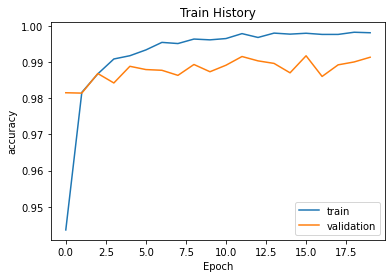

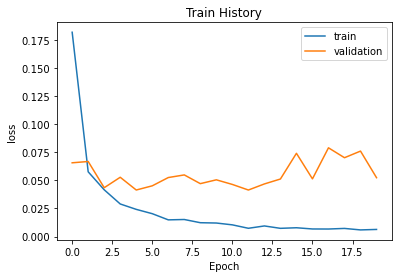

In [18]:
"""
编译网络并训练
"""
x_train, y_train, x_val, y_val, x_test, y_test = get_mnist_data()
model = LeNet5()

# 编译网络（定义损失函数、优化器、评估指标）
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 开始网络训练（定义训练数据与验证数据、定义训练代数，定义训练批大小）
train_history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=20, batch_size=32, verbose=2)

# 模型保存
model.save('lenet_mnist.h5')

# 定义训练过程可视化函数（训练集损失、验证集损失、训练集精度、验证集精度）
def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='best')
    plt.show()

show_train_history(train_history, 'accuracy', 'val_accuracy')
show_train_history(train_history, 'loss', 'val_loss')


In [19]:
# 输出网络在测试集上的损失与精度
score = model.evaluate(x_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# 测试集结果预测
predictions = model.predict(x_test)
predictions = np.argmax(predictions, axis=1)
print('前20张图片预测结果：', predictions[:20])


313/313 [==============================] - 1s 3ms/step - loss: 0.0396 - accuracy: 0.9924
Test loss: 0.03956345096230507
Test accuracy: 0.9923999905586243
313/313 [==============================] - 1s 3ms/step
前20张图片预测结果： [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]


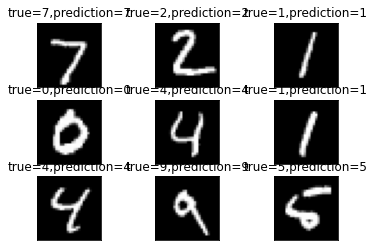

In [10]:
# 预测结果图像可视化
(x_train_original, y_train_original), (x_test_original, y_test_original) = mnist.load_data()
def mnist_visualize_multiple_predict(start, end, length, width):
    for i in range(start, end):
        plt.subplot(length, width, 1 + i)
        plt.imshow(x_test_original[i], cmap=plt.get_cmap('gray'))
        title_true = 'true=' + str(y_test_original[i])
        title_prediction = ',' + 'prediction=' + str(predictions[i])
        title = title_true + title_prediction
        plt.title(title)
        plt.xticks([])
        plt.yticks([])
    plt.show()

mnist_visualize_multiple_predict(start=0, end=9, length=3, width=3)
